(379, 13) (379,)
loss = 221.277042
loss = 203.339953
loss = 187.097272
loss = 172.388074
loss = 159.066725
loss = 147.001428
loss = 136.072911
loss = 126.173234
loss = 265.661233
loss = 245.232843
loss = 226.664587
loss = 209.785856
loss = 194.441708
loss = 180.491425
loss = 167.807210
loss = 156.272999


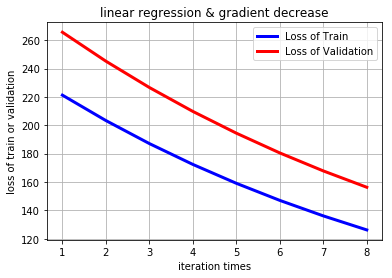

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split


def loadDataset():
    # 读取数据
    X, y = load_svmlight_file("D:\\machine learning\experiment\data\Housing_scale.txt")
    # 将稀疏矩阵转化为完整特征矩阵
    X.todense()
    # 将数据集切分为训练集和验证集
    X_train, X_validation, y_train, y_validation = train_test_split(X, y, random_state=0)
    print(X_train.shape, y_train.shape)
    return X_train, X_validation, y_train, y_validation


def gradientDescent(alpha,maxCycles,X_data,y_data):

    num = y_data.shape[0]    #样本数量
    # 线性模型参数正态分布初始化
    w = np.random.normal(size=(X_data.shape[1]))
    b = np.random.normal(size=1)
    losses = []

    # 迭代次maxCycles次
    for n in range(maxCycles):
	    grad_w = np.zeros(X_data.shape[1])
	    grad_b = np.zeros(1)
	    loss = 0
	    for i in range(num):
		    y = np.dot( X_data[i].data, w ) + b
		    loss += np.power((y - y_data[i]),2) / ( 2 * num)
		    grad_w += ( y - y_data[i] ) * X_data[i].data / num
		    grad_b += ( y - y_data[i] ) / num
	    # 更新模型参数
	    w -= alpha * grad_w
	    b -= alpha * grad_b
	    losses.append(loss)
	    print("loss = %f" % loss)
    return losses

def plotLossPerTime(n,losses_train,losses_validation):
	plt.xlabel('iteration times')
	plt.ylabel('loss of train or validation')
	plt.title('linear regression & gradient decrease')
	n_cycles = range(1,n+1)
	plt.plot(n_cycles, losses_train, label = "Loss of Train", color='blue', linewidth=3)
	plt.plot(n_cycles, losses_validation, label = "Loss of Validation", color='red', linewidth=3)
	plt.legend(loc=0)
	plt.grid()
	plt.show()


# main
X_train, X_validation, y_train, y_validation = loadDataset()
alpha = 0.01
maxCycles = 8
losses_train = gradientDescent(alpha, maxCycles, X_train, y_train)
losses_validation = gradientDescent(alpha, maxCycles, X_validation, y_validation)
plotLossPerTime(maxCycles, losses_train, losses_validation)